In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys
import cv2
import torch
import matplotlib.pyplot as plt
import numpy
from copy import deepcopy
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [ ]:
from IPython.core.display import display_javascript
img1_path = "/content/drive/My Drive/Image Super Resolution/SRGAN/output_srresnet/1.jpg"
img2_path = "/content/drive/My Drive/Image Super Resolution/SRGAN/output_srresnet/2.jpg" 

def metrics(img1, img2, save_loc = None):
  # img1 = cv2.imread(img1_path)
  # img2 = cv2.imread(img2_path)
  psnr = peak_signal_noise_ratio(img1, img2, data_range=255.) 
  ssim = structural_similarity(img1, img2, data_range=255., multichannel= True)
  #ax = plt.imshow(img1)
  #plt.axis('off')
  #plt.title("PSNR : {:.3f}    SSIM: {:.3f}".format(psnr, ssim), fontsize = 20)
  # plt.savefig(save_loc, display_javascript = 300, bbox_inches = "tight")
  #plt.show()
  return psnr, ssim

In [ ]:
img = "0090.png"
img1 = "91.jpg"
gt_path = "/content/drive/My Drive/Image Super Resolution/data/Test/HR/" + img
lr_path = "/content/drive/My Drive/Image Super Resolution/data/Test/LR/" + img


gt = cv2.imread(gt_path)
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)

lr = cv2.imread(lr_path)
lr = cv2.cvtColor(lr, cv2.COLOR_BGR2RGB)
hr = cv2.resize(lr, (512,512), fx=4, fy=4, interpolation=cv2.INTER_CUBIC)


# srcnn_path = "/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/RModel1/0054.png"
# drnn_path = "/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/0054.png"
# res_path = "/content/drive/My Drive/Image Super Resolution/SRGAN/srresnet-model1/test/0054.png"
# gan_path = "/content/drive/My Drive/Image Super Resolution/SRGAN/srgan-models/model1/test/0054.png"


In [ ]:
def colab(gt, hr, v1, v2, v3, v4,save_loc,title):
  fig, ax = plt.subplots(ncols=3, nrows = 2,figsize=(10,8))
  # fig = plt.figure(figsize=(10,10))
  # plt.subplots_adjust(left=0, bottom=None, right=0, top=None, wspace=None, hspace=None)
  #plt.rcParams['figure.constrained_layout.use'] = True
  fig.suptitle(title)

  ax[0,0].imshow(gt)
  ax[0,0].axis('off')
  ax[0,0].set_title("Ground Truth HR")
  

  ax[0,1].imshow(hr)
  ax[0,1].axis('off')
  p1,s1 = metrics(gt,hr)
  ax[0,1].set_title("Bicubic HR \n PNSR = {:.02f}, SSIM = {:.02f}".format(p1,s1))

  ax[0,2].imshow(v1)
  ax[0,2].axis('off')
  p2,s2 = metrics(gt,v1)
  ax[0,2].set_title("Experiment 1 \n PNSR = {:.02f}, SSIM = {:.02f}".format(p2,s2))

  ax[1,0].imshow(v2)
  ax[1,0].axis('off')
  p3,s3 = metrics(gt,v2)
  ax[1,0].set_title("Experiment 2  \n PNSR = {:.02f}, SSIM = {:.02f}".format(p3,s3))

  ax[1,1].imshow(v3)
  ax[1,1].axis('off')
  p4,s4 = metrics(gt,v3)
  ax[1,1].set_title("Experiment 3 \n PNSR = {:.02f}, SSIM = {:.02f}".format(p4,s4))

  ax[1,2].imshow(v4)
  ax[1,2].axis('off')
  p5,s5 = metrics(gt,v4)
  ax[1,2].set_title("Experiment 4 \n PNSR = {:.02f}, SSIM = {:.02f}".format(p5,s5))
  fig.savefig(save_loc, display_javascript = 300, bbox_inches = "tight")
  plt.show()

In [ ]:
def colab_gan(gt, hr, v1, v2,save_loc,title):
  fig, ax = plt.subplots(ncols=2, nrows = 2,figsize=(10,8))
  # fig = plt.figure(figsize=(10,10))
  # plt.subplots_adjust(left=0, bottom=None, right=0, top=None, wspace=None, hspace=None)
  #plt.rcParams['figure.constrained_layout.use'] = True
  fig.suptitle(title)

  ax[0,0].imshow(gt)
  ax[0,0].axis('off')
  ax[0,0].set_title("Ground Truth HR")
  
  ax[0,1].imshow(hr)
  ax[0,1].axis('off')
  p1,s1 = metrics(gt,hr)
  ax[0,1].set_title("Bicubic HR \n PNSR = {:.02f}, SSIM = {:.02f}".format(p1,s1))

  ax[1,0].imshow(v1)
  ax[1,0].axis('off')
  p2,s2 = metrics(gt,v1)
  ax[1,0].set_title("Experiment 1 \n PNSR = {:.02f}, SSIM = {:.02f}".format(p2,s2))

  ax[1,1].imshow(v2)
  ax[1,1].axis('off')
  p3,s3 = metrics(gt,v2)
  ax[1,1].set_title("Experiment 2  \n PNSR = {:.02f}, SSIM = {:.02f}".format(p3,s3))


  fig.savefig(save_loc, display_javascript = 300, bbox_inches = "tight")
  plt.show()

In [ ]:
# save_loc = "/content/drive/My Drive/Image Super Resolution/results/result-srcnn.png"
##0013.png
# srcnn1 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/RModel1/" + img)
# srcnn1 = cv2.cvtColor(srcnn1, cv2.COLOR_BGR2RGB)

# srcnn2 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/Model1/" + img)
# srcnn2 = cv2.cvtColor(srcnn2, cv2.COLOR_BGR2RGB)

# srcnn3 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/RModel2/" + img)
# srcnn3 = cv2.cvtColor(srcnn3, cv2.COLOR_BGR2RGB)

# srcnn4 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/Model2/" + img)
# srcnn4 = cv2.cvtColor(srcnn4, cv2.COLOR_BGR2RGB)

# colab(gt,hr,srcnn1,srcnn2,srcnn3,srcnn4,save_loc, "SRCNN Result")

In [ ]:
# save_loc = "/content/drive/My Drive/Image Super Resolution/results/result-drrn.png"
# #0007.png
# drnn1 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/RModel4/" + img)
# drnn1 = cv2.cvtColor(drnn1, cv2.COLOR_BGR2RGB)

# drnn2 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/Model5/" + img)
# drnn2 = cv2.cvtColor(drnn2, cv2.COLOR_BGR2RGB)

# drnn3 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/RModel5/" + img)
# drnn3 = cv2.cvtColor(drnn3, cv2.COLOR_BGR2RGB)

# drnn4 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRCNN/Test Output/Model4/" + img)
# drnn4 = cv2.cvtColor(drnn4, cv2.COLOR_BGR2RGB)

# colab(gt,hr,drnn1,drnn2,drnn3,drnn4,save_loc, "DRRN Result")

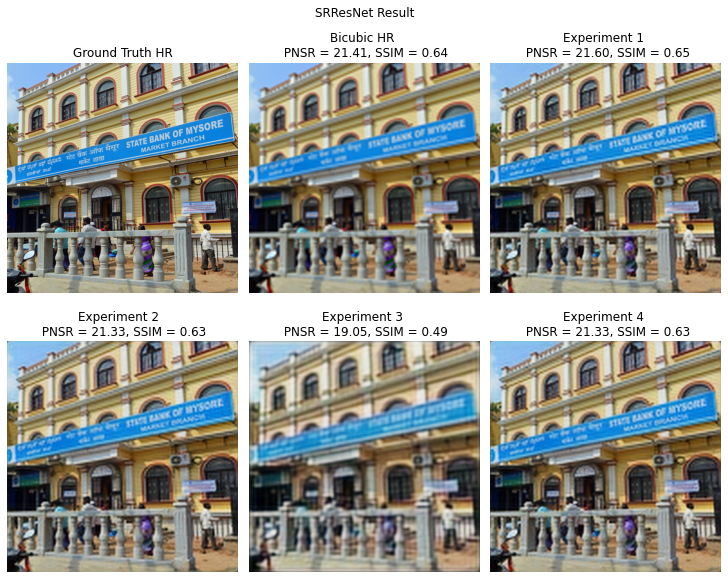

In [ ]:
save_loc = "/content/drive/My Drive/Image Super Resolution/results/result-srresnet.png"

drnn1 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRGAN/srresnet-models/model1/test/" + img1)
drnn1 = cv2.cvtColor(drnn1, cv2.COLOR_BGR2RGB)

drnn2 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRGAN/srresnet-models/model4/test/" + img1)
drnn2 = cv2.cvtColor(drnn2, cv2.COLOR_BGR2RGB)

drnn3 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRGAN/srresnet-models/model2/test/" + img1)
drnn3 = cv2.cvtColor(drnn3, cv2.COLOR_BGR2RGB)

drnn4 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRGAN/srresnet-models/model3/test/" + img1)
drnn4 = cv2.cvtColor(drnn4, cv2.COLOR_BGR2RGB)

colab(gt,hr,drnn1,drnn2,drnn3,drnn2,save_loc, "SRResNet Result")

In [ ]:
# save_loc = "/content/drive/My Drive/Image Super Resolution/results/result-srgan.png"

# drnn1 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRGAN/srgan-models/model4-new/test/" + img1)
# drnn1 = cv2.cvtColor(drnn1, cv2.COLOR_BGR2RGB)

# drnn2 = cv2.imread("/content/drive/My Drive/Image Super Resolution/SRGAN/srgan-models/model4/test/" + img1)
# drnn2 = cv2.cvtColor(drnn2, cv2.COLOR_BGR2RGB)

# colab_gan(gt,hr,drnn1,drnn2,save_loc, "SRGAN Result")

In [ ]:
def colab(lr, hr, v1, v2, v3, v4):
  fig, ax = plt.subplots(ncols=2, nrows = 3,figsize=(10,10))
  fig = plt.figure(figsize=(10,10))
  # plt.subplots_adjust(left=0, bottom=None, right=0, top=None, wspace=None, hspace=None)
  fig.subplots_adjust(hspace=0)
  #plt.rcParams['figure.constrained_layout.use'] = True
  ax[0,0].imshow(lr)
  ax[0,0].axis('off')
  ax[0,0].set_title("Low Resolution")

  ax[0,1].imshow(hr)
  ax[0,1].axis('off')
  ax[0,1].set_title("High Resolution")

  ax[1,0].imshow(v1)
  ax[1,0].axis('off')
  ax[1,0].set_title("Experiment 1")

  ax[1,1].imshow(v2)
  ax[1,1].axis('off')
  ax[1,1].set_title("Experiment 2")

  ax[2,0].imshow(v3)
  ax[2,0].axis('off')
  ax[2,0].set_title("Experiment 3")

  ax[2,1].imshow(v4)
  ax[2,1].axis('off')
  ax[2,1].set_title("Experiment 4")
  
  fig.tight_layout()

In [ ]:
""